# 두 random 변수간의 연관성 - Correlation Coefficient (상관계수)

## covariance 

- 한 변수의 variance 가 얼마나 많이 다른 변수의 variance 로 설명되는지를 측정한 것. 즉, Y 가 변할 때마다, X 가 얼마나 변하는지 check 하여 따라서 변화하는 정도가 크면 high covariance 를 갖는다고 말함.  

- Covariance 자체로는 큰 의미가 없다.


## 상관계수

- 두개의 변수가 linear 한 정도를 측정하는 것  

- Correlation 은 단순히 정규화된 형태의 covariance 이다. 정규화하지 않으면 correlation 과 covariance 는 일상 대화에서 거의 비슷한 의미로 사용된다. 두개는 개념적으로는 거의 동일하다. 


- 두 변수는 price 와 price 가 될 수도 있고, price 와 강우량이 될 수도 있다. 어떤 조합도 가능  

- 그 값은 언제나 -1 과 1 사이  

- 양의 계수는 두개의 변수가 직접 연결된 것을 표시. 하나가 증가하면 다른 하나도 증가.  

- 음의 계수는 두개의 변수가 역으로 관련된 것을 표시. 하나가 증가하면 다른 하나는 감소.   

- 상관계수가 0 에 가까워질수록 두 변수간의 관계는 약화

- 두개의 random data set 은 0 에 가까운 correlation 을 갖는다.

- 두 변수 $X$ 와 $Y$ 가 다음과 같이 정의되면, 상관계수는
$$r = \frac{Cov(X,Y)}{std(X)std(Y)}$$

## 두개의 random variable 의 correlation

- 서로간의 correlation이 없는 두 개의 변수

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(50)
Y = np.random.rand(50)

corr_XY = np.corrcoef(X, Y)
print(corr_XY)

[[ 1.         -0.04943026]
 [-0.04943026  1.        ]]


- correlation 을 부여한 두개의 random variable을 비교

[[1.         0.95453865]
 [0.95453865 1.        ]]

Correlation 직접 계산: 0.9740190322249701
numpy 내장 함수 사용: 0.9545386515804706


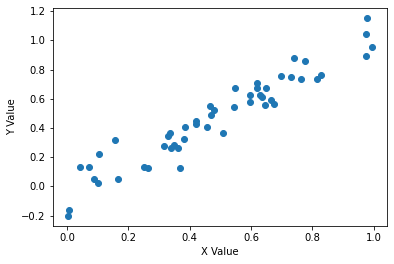

In [2]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)       # 약간의 noise 추가

print(np.corrcoef(X, Y))
print()

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation 직접 계산: ' + str(np.cov(X,Y)[0, 1]/
                                  (np.std(X)*np.std(Y))))
print('numpy 내장 함수 사용: ' + str(np.corrcoef(X, Y)[0, 1]))

역의 상관 관계를 만들어 본다.

[[ 1.       -0.965697]
 [-0.965697  1.      ]]

Correlation: -0.965697003347591


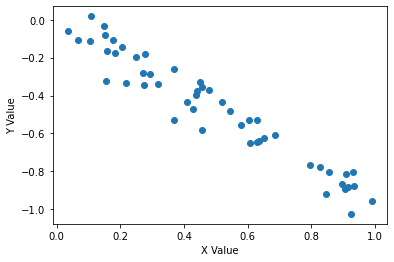

In [3]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, .1, 50)

print(np.corrcoef(X, Y))
print()

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

## Correlation 의 금융 data 적용

### 관련된 자산들을 파악

- 두개의 자산이 correlated 라는 것은 움직임이 비슷하다는 의미  

- 주의할 점은 두개의 자산이 correlated 라는 것은 움직임이 비슷하다는 것이지 한 자산의 움직임이 다른 자산의 움직임을 일으킨다는 의미는 아니란 것이다.

### 서로 연관성 없는 자산들로 portfolio 구성

finance 에서 correlation 이 유용한 이유는 portfolio 구성에 있다. 연관성 없는 자산들로 portfolio 를 구성하면 안정된 수익을 기대할 수 있다.

### 상관계수의 한계점

- 변수들이 정규분포 되어 있지 않은 경우 특히 correlation 이 중요한지 말하기 쉽지 않다. 상관계수는 1 에 가까운 경우 측정 기간 동안 두개의 주식이 correlate  되어있다고 말할 수 있지만 미래에도 그럴지 알 수 없다.   
- KOSPI 지수와 correlation 이 높은 주식들은 다른 평균적인 주식 보다 개별 주식간의 correlation 이 좀 더 높을 것이다.  
- 특정 시점에만 correlated 된 것 처럼 보일 수 있으므로 긴 기간에 걸쳐 상관계수를 검사해야 한다. 긴 기간 동안 correlation 이 얼마나 stable 한가 측정할 필요가 있다.

## 주식 종목 간의 상관 관계
지난 1 년간의 기아차, 강원랜드, 현대차의 상관 관계 파악

In [4]:
import numpy as np
import warnings
import FinanceDataReader as fdr
from pandas_datareader import data as pdr
import datetime as dt
import pandas as pd
pd.set_option('display.max_rows', None)

num_of_years = 1
start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
end = dt.date.today()
start, end

(datetime.date(2021, 8, 3), datetime.date(2022, 8, 3))

In [5]:
KIA = fdr.DataReader('000270', start, end)['Close']
KangwonLand = fdr.DataReader('035250', start, end)['Close']
HYUNDAI = fdr.DataReader('005380', start, end)['Close']

In [6]:
KIA.shape, KangwonLand.shape, HYUNDAI.shape

((246,), (246,), (246,))

In [7]:
np.corrcoef(KIA, HYUNDAI)

array([[1.        , 0.78893478],
       [0.78893478, 1.        ]])

In [8]:
np.corrcoef(KIA, KangwonLand)

array([[ 1.       , -0.0696599],
       [-0.0696599,  1.       ]])

KIA 차와 Hyundai 차:  0.7889347838299458
KIA차와 강원랜드:  -0.06965989696695993


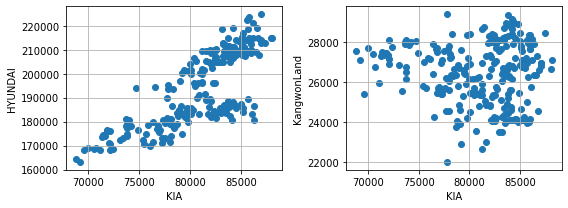

In [9]:
print("KIA 차와 Hyundai 차: ", np.corrcoef(KIA, HYUNDAI)[0,1])
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.scatter(KIA, HYUNDAI)
plt.xlabel('KIA')
plt.ylabel('HYUNDAI')
plt.grid(True)

print("KIA차와 강원랜드: ", np.corrcoef(KIA, KangwonLand)[0,1])
plt.subplot(1, 2, 2)
plt.scatter(KIA, KangwonLand)
plt.xlabel('KIA')
plt.ylabel('KangwonLand')
plt.grid(True)
plt.tight_layout()

### 서로 연관성 없는 자산들로 portfolio 구성

finance 에서 correlation 이 유용한 이유는 portfolio 구성에 있다. 연관성 없는 자산들로 portfolio 를 구성하면 안정된 수익을 기대할 수 있다.

### 상관계수의 한계점

- 변수들이 정규분포 되어 있지 않은 경우 특히 correlation 이 중요한지 말하기 쉽지 않다. 상관계수는 1 에 가까운 경우 측정 기간 동안 두개의 주식이 correlate  되어있다고 말할 수 있지만 미래에도 그럴지 알 수 없다.   
- KOSPI 지수와 correlation 이 높은 주식들은 다른 평균적인 주식 보다 개별 주식간의 correlation 이 좀 더 높을 것이다.  
- 특정 시점에만 correlated 된 것 처럼 보일 수 있으므로 긴 기간에 걸쳐 상관계수를 검사해야 한다. 긴 기간 동안 correlation 이 얼마나 stable 한가 측정할 필요가 있다.

- KOSPI 종목 간의 상관 관계 파악  
- 시가 총액을 바꾸어 가며 TEST

In [22]:
df = pd.read_csv("kospi200_20220723.csv", encoding="cp949")
tickers = [(str(code).rjust(6, '0')+'.KS', name) for code, name, marketcap 
   in zip(df['종목코드'].values, df['종목명'].values, df['상장시가총액'].values)
           if marketcap > 10_000_000] 
print("KOSPI 종목 수", len(tickers))
tickers

KOSPI 종목 수 34


[('005930.KS', '삼성전자'),
 ('373220.KS', 'LG에너지솔루션'),
 ('000660.KS', 'SK하이닉스'),
 ('207940.KS', '삼성바이오로직스'),
 ('035420.KS', 'NAVER'),
 ('005380.KS', '현대차'),
 ('051910.KS', 'LG화학'),
 ('006400.KS', '삼성SDI'),
 ('000270.KS', '기아'),
 ('035720.KS', '카카오'),
 ('068270.KS', '셀트리온'),
 ('028260.KS', '삼성물산'),
 ('012330.KS', '현대모비스'),
 ('005490.KS', 'POSCO홀딩스'),
 ('105560.KS', 'KB금융'),
 ('055550.KS', '신한지주'),
 ('096770.KS', 'SK이노베이션'),
 ('034730.KS', 'SK'),
 ('066570.KS', 'LG전자'),
 ('323410.KS', '카카오뱅크'),
 ('015760.KS', '한국전력'),
 ('259960.KS', '크래프톤'),
 ('003550.KS', 'LG'),
 ('011200.KS', 'HMM'),
 ('032830.KS', '삼성생명'),
 ('051900.KS', 'LG생활건강'),
 ('017670.KS', 'SK텔레콤'),
 ('034020.KS', '두산에너빌리티'),
 ('033780.KS', 'KT&G'),
 ('329180.KS', '현대중공업'),
 ('086790.KS', '하나금융지주'),
 ('009150.KS', '삼성전기'),
 ('018260.KS', '삼성에스디에스'),
 ('010950.KS', 'S-Oil')]

In [23]:
dataset = pdr.get_data_yahoo([ticker for ticker, name in tickers], 
                             start, end)['Adj Close']
dataset.columns = [name for ticker, name in tickers]

print('\nCorrelation Matrix')
corr_matrix = dataset.corr()
corr_matrix


Correlation Matrix


삼성전자  LG에너지솔루션    SK하이닉스  삼성바이오로직스     NAVER       현대차  \
삼성전자      1.000000  0.594684  0.638524  0.436991  0.778990  0.628271   
LG에너지솔루션  0.594684  1.000000  0.530515 -0.335944  0.473963  0.256850   
SK하이닉스    0.638524  0.530515  1.000000 -0.212334  0.145885  0.018633   
삼성바이오로직스  0.436991 -0.335944 -0.212334  1.000000  0.699083  0.709400   
NAVER     0.778990  0.473963  0.145885  0.699083  1.000000  0.744955   
현대차       0.628271  0.256850  0.018633  0.709400  0.744955  1.000000   
LG화학      0.578150  0.663642 -0.098466  0.651665  0.822004  0.840087   
삼성SDI     0.574942  0.384979 -0.142256  0.780875  0.865949  0.862657   
기아        0.166774  0.110073 -0.060347  0.278703  0.132049  0.637024   
카카오       0.689735  0.266074  0.044460  0.762235  0.971967  0.698918   
셀트리온      0.459254 -0.519673 -0.284827  0.856973  0.777934  0.694816   
삼성물산      0.230948 -0.527803 -0.301439  0.633852  0.367664  0.463068   
현대모비스     0.721045  0.539789  0.043306  0.675512  0.848234  0.869006   
POSCO홀딩스  0.641879  0.359779  0.085994  0.502003  0.691685  0.442834   
KB금융      0.257530  0.618852  0.688929 -0.493225 -0.111845 -0.285946   
신한지주     -0.190238  0.389284  0.162755 -0.474329 -0.427568 -0.488188   
SK이노베이션   0.603019  0.592274  0.031422  0.431508  0.673999  0.614327   
SK        0.583253  0.109272  0.079416  0.617076  0.651409  0.506411   
LG전자      0.899677  0.483362  0.435126  0.536438  0.835591  0.616907   
카카오뱅크     0.703218  0.335331  0.054108  0.785066  0.939762  0.651326   
한국전력      0.185764 -0.270950 -0.207588  0.404040  0.414282  0.136400   
크래프톤      0.625954  0.505575 -0.046048  0.710737  0.906676  0.792002   
LG        0.380974 -0.026992 -0.379922  0.715323  0.746956  0.763503   
HMM       0.375658 -0.159180 -0.108250  0.560999  0.492961  0.218797   
삼성생명      0.453167  0.330130 -0.147624  0.584360  0.567250  0.507414   
LG생활건강    0.716481  0.520533  0.006971  0.689378  0.945308  0.754217   
SK텔레콤     0.335390 -0.003868 -0.370281  0.572796  0.765650  0.621033   
두산에너빌리티   0.296997 -0.211578  0.001209  0.358199  0.613687  0.410389   
KT&G     -0.593473 -0.323205  0.015639 -0.514729 -0.762445 -0.599393   
현대중공업    -0.742498 -0.393031 -0.466887 -0.234013 -0.625150 -0.496814   
하나금융지주    0.182973  0.477809  0.536942 -0.455203 -0.126791 -0.425684   
삼성전기      0.949018  0.601317  0.605320  0.444576  0.717956  0.638238   
삼성에스디에스   0.725278  0.298948  0.021351  0.779322  0.842615  0.810666   
S-Oil    -0.472697 -0.056615 -0.486729 -0.219396 -0.385516 -0.266284   

              LG화학     삼성SDI        기아       카카오  ...      삼성생명    LG생활건강  \
삼성전자      0.578150  0.574942  0.166774  0.689735  ...  0.453167  0.716481   
LG에너지솔루션  0.663642  0.384979  0.110073  0.266074  ...  0.330130  0.520533   
SK하이닉스   -0.098466 -0.142256 -0.060347  0.044460  ... -0.147624  0.006971   
삼성바이오로직스  0.651665  0.780875  0.278703  0.762235  ...  0.584360  0.689378   
NAVER     0.822004  0.865949  0.132049  0.971967  ...  0.567250  0.945308   
현대차       0.840087  0.862657  0.637024  0.698918  ...  0.507414  0.754217   
LG화학      1.000000  0.880561  0.355439  0.771008  ...  0.562755  0.853052   
삼성SDI     0.880561  1.000000  0.435206  0.861943  ...  0.638368  0.869638   
기아        0.355439  0.435206  1.000000  0.107117  ...  0.332416  0.160234   
카카오       0.771008  0.861943  0.107117  1.000000  ...  0.600981  0.925955   
셀트리온      0.734117  0.811539  0.160306  0.830873  ...  0.607412  0.843632   
삼성물산      0.415221  0.463584  0.270225  0.461977  ...  0.717905  0.460194   
현대모비스     0.875648  0.811143  0.326769  0.799369  ...  0.582582  0.901213   
POSCO홀딩스  0.515037  0.595980  0.147765  0.695190  ...  0.818376  0.713167   
KB금융     -0.272602 -0.303236 -0.039129 -0.197618  ... -0.048069 -0.221784   
신한지주     -0.468529 -0.422544  0.048227 -0.415162  ...  0.189329 -0.446669   
SK이노베이션   0.720281  0.675930  0.283232  0.606001  ...  0.718914  0.694046   
SK        0.430517  0.638837  0.283290  0.683357  ...  0.681426  0.628319   
LG전자      0.623268  0.673184  

In [24]:
corr_matrix['삼성전자'].sort_values(ascending=False)

삼성전자        1.000000
삼성전기        0.949018
LG전자        0.899677
NAVER       0.778990
삼성에스디에스     0.725278
현대모비스       0.721045
LG생활건강      0.716481
카카오뱅크       0.703218
카카오         0.689735
POSCO홀딩스    0.641879
SK하이닉스      0.638524
현대차         0.628271
크래프톤        0.625954
SK이노베이션     0.603019
LG에너지솔루션    0.594684
SK          0.583253
LG화학        0.578150
삼성SDI       0.574942
셀트리온        0.459254
삼성생명        0.453167
삼성바이오로직스    0.436991
LG          0.380974
HMM         0.375658
SK텔레콤       0.335390
두산에너빌리티     0.296997
KB금융        0.257530
삼성물산        0.230948
한국전력        0.185764
하나금융지주      0.182973
기아          0.166774
신한지주       -0.190238
S-Oil      -0.472697
KT&G       -0.593473
현대중공업      -0.742498
Name: 삼성전자, dtype: float64

<AxesSubplot:xlabel='Date'>

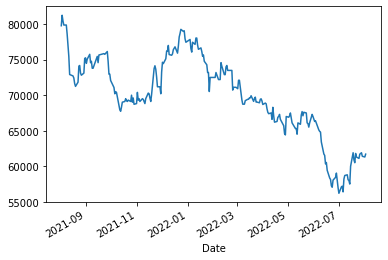

In [25]:
dataset['삼성전자'].plot()

<AxesSubplot:xlabel='Date'>

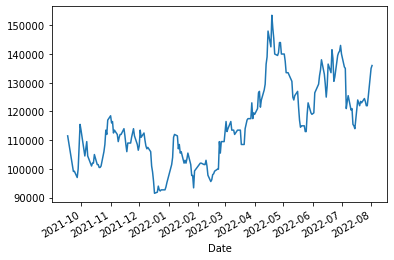

In [27]:
dataset['현대중공업'].plot()